In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
import pandas as pd
import itertools
import sys
import os
import math
sys.path.append('../..')
from joblib import Parallel, delayed
from functools import partial
from hyperopt import hp, tpe, fmin, Trials
from models.optim.sir_dis import SIR
from utils.optim.sir.objective_functions import *
from utils.optim.sir.optimization_methods import *
from matplotlib import colors

# No Intervention

33.3670105002574 0.32812282332748155 137.203125 27.299962832626676


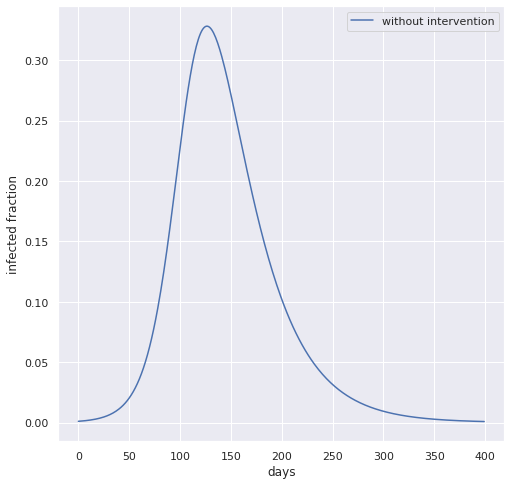

In [25]:
days = 400
params = {'R0': 3.2, 'T_treat': 35}
grad1, states_base = calculate_opt(intervention_day=np.array([100]), intervention_duration=np.array([50]), intervention_choice=np.array([0]), days=days, params=params)
height = calculate_opt_height(intervention_day=np.array([100]), intervention_duration=np.array([50]), intervention_choice=np.array([0]), days=days, params=params)
time = calculate_opt_time(intervention_day=np.array([100]), intervention_duration=np.array([50]), intervention_choice=np.array([0]), days=days, params=params)
burden = calculate_opt_burden(intervention_day=np.array([100]), intervention_duration=np.array([50]), intervention_choice=np.array([0]), days=days, capacity=np.array([0.1]), params=params)
print(grad1, height, time, burden)
ind = np.arange(days)   # the x locations for the groups
plt.figure(figsize=(8,8))
plt.plot(ind, states_base[1], label='without intervention')
plt.ylabel('infected fraction')
plt.xlabel('days')
plt.legend()
plt.show()

# Grid Search

### Plot Results for Grid Search

54
{'start_array': array([90]), 'duration_array': array([160]), 'choice_array': array([0.5])}
22.715980701038443 0.1909917985015741 126.42105263157895 14.008550016881227
2286
{'start_array': array([ 70, 100]), 'duration_array': array([ 20, 150]), 'choice_array': array([0.25, 0.5 ])}
22.679627884358585 0.17604340516533548 136.05882352941177 12.872083992167717
1694
{'start_array': array([ 10,  70, 130]), 'duration_array': array([ 10,  50, 130]), 'choice_array': array([0.25, 0.25, 0.5 ])}
23.033955431609552 0.1983096075490318 146.28947368421052 13.80276524729298


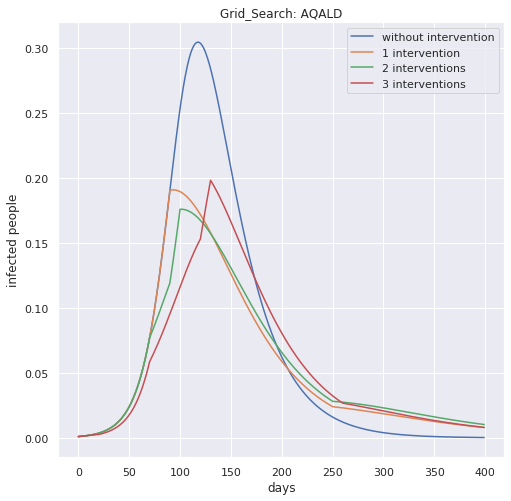

In [95]:
days = 400
#num_int = 1
min_val, min_params = grid_search(num_int=1, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
ind = np.arange(days)   # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8, 8))
plt.plot(ind, states_base[1], label='without intervention')
plt.plot(ind, states[1], label='1 intervention')

#num_int = 2
min_val, min_params = grid_search(num_int=2, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
plt.plot(ind, states[1], label='2 interventions')

#num_int = 3
min_val, min_params = grid_search(num_int=3, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
plt.plot(ind, states[1], label='3 interventions')

plt.ylabel('infected people')
plt.xlabel('days')
plt.title('Grid_Search: AQALD')
plt.legend()
plt.show()

# Bayesian Search

### Running bayesian search

100%|██████████| 3000/3000 [01:20<00:00, 37.14trial/s, best loss: 22.81188717517312] 
{'choice_array': array([0.5]), 'start_array': array([80]), 'duration_array': array([160])}
22.81188717517312 0.13887056084740307 144.76923076923077 11.42891364269675
100%|██████████| 3000/3000 [01:57<00:00, 25.51trial/s, best loss: 24.400552577453126]
{'choice_array': array([1, 1]), 'start_array': array([110, 190]), 'duration_array': array([70, 10])}
24.400552577453126 0.29512854531591576 119.8103448275862 16.13874192845121
100%|██████████| 3000/3000 [02:17<00:00, 21.82trial/s, best loss: 100.0]
{'choice_array': array([0.5, 1. , 0.5]), 'start_array': array([250, 370, 250]), 'duration_array': array([150, 230,  90])}
28.21609305717157 0.3046673195985664 126.6 22.736303103841145


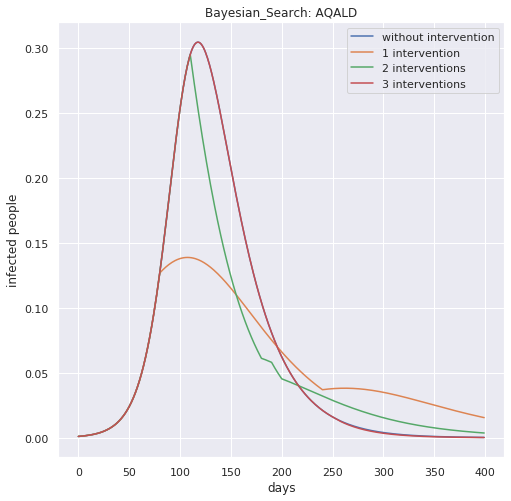

In [96]:
days = 400
min_params = tpe_opt(num_int=1, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
ind = np.arange(days)   # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8, 8))
plt.plot(ind, states_base[1], label='without intervention')
plt.plot(ind, states[1], label='1 intervention')

#num_int = 2
min_params = tpe_opt(num_int=2, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
plt.plot(ind, states[1], label='2 interventions')

#num_int = 3
min_params = tpe_opt(num_int=3, days=days, objective='qald')
print(min_params)
val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days)
print(val, height, time, burden)
plt.plot(ind, states[1], label='3 interventions')

plt.ylabel('infected people')
plt.xlabel('days')
plt.title('Bayesian_Search: AQALD')
plt.legend()
plt.show()

### Bayesian search over grid search

54
100%|██████████| 500/500 [00:04<00:00, 103.43trial/s, best loss: 0.15715757031766664]
{'choice_array': array([1]), 'start_array': array([86]), 'duration_array': array([80])}
31.430232576527175 0.15715757031766664 172.6 24.202452199130065


/home/users/bhardwaj/env_covid/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2286
100%|██████████| 1000/1000 [00:22<00:00, 44.26trial/s, best loss: 0.15637437799399703]
{'choice_array': array([0.5, 1. ]), 'start_array': array([78, 99]), 'duration_array': array([20, 70])}
31.373228119688832 0.15637437799399703 174.43333333333334 24.024905009394125


/home/users/bhardwaj/env_covid/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1694
100%|██████████| 1500/1500 [01:01<00:00, 24.46trial/s, best loss: 0.18142312538562105]
{'choice_array': array([0.25, 0.5 , 0.25]), 'start_array': array([ 17,  68, 243]), 'duration_array': array([ 50, 130,  10])}
31.567334595898355 0.18142312538562105 198.86111111111111 22.99437105275868


/home/users/bhardwaj/env_covid/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


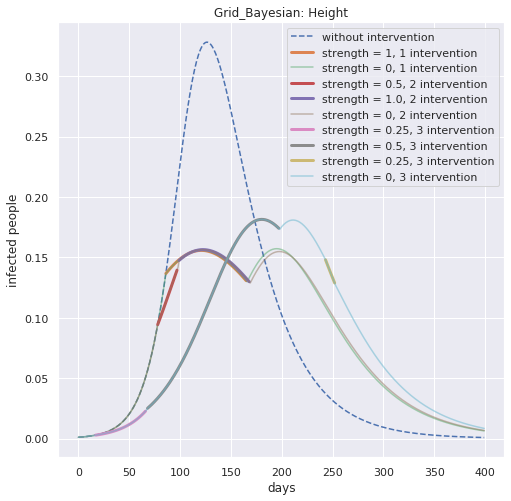

In [26]:
days = 400

def get_stats(min_params, params=None):
    val, states = calculate_opt(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
              intervention_choice=min_params['choice_array'], days=days, params=params)
    height = calculate_opt_height(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
                  intervention_choice=min_params['choice_array'], days=days, params=params)
    time = calculate_opt_time(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
                  intervention_choice=min_params['choice_array'], days=days, params=params)
    burden = calculate_opt_burden(intervention_day=min_params['start_array'], intervention_duration=min_params['duration_array'],\
                  intervention_choice=min_params['choice_array'], days=days, params=params)
    print(val, height, time, burden)
    return(states)

def get_plot(states, fig, num, min_params=None):
    ind = np.arange(len(states[1]))
    ax = fig.add_subplot(1, 1, 1)
    if(not num):
        ax.plot(ind, states[1], label='without intervention', linestyle='dashed')
    else:
        k = len(min_params['start_array'])
        for i in range(k):
            xi = ind[min_params['start_array'][i]:min_params['start_array'][i]+min_params['duration_array'][i]]
            yi = states[1][min_params['start_array'][i]:min_params['start_array'][i]+min_params['duration_array'][i]]
            choice = min_params['choice_array'][i]
            ax.plot(xi, yi, label='strength = '+str(choice)+', '+str(num)+' intervention', linewidth=3)
        ax.plot(ind, states[1], alpha=0.5, label='strength = 0, '+str(num)+' intervention')
    ax.set_ylabel('infected people')
    ax.set_xlabel('days')
    ax.set_title('Grid_Bayesian: Height')
    ax.legend()
    return(fig)

#num_int=1
params = {'R0': 3.2, 'T_treat': 35}
_, min_params = grid_search(num_int=1, days=days, objective='height', sir_init=params)
min_params = tpe_grid(num_int=1, days=days, min_params=min_params, objective='height', iters=500, sir_init=params)
print(min_params)
states = get_stats(min_params, params)

fig = plt.figure(figsize=(8, 8))
fig = get_plot(fig=fig,states=states_base,num=0)
fig = get_plot(fig=fig,states=states,num=1,min_params=min_params)

#num_int = 2
_, min_params = grid_search(num_int=2, days=days, objective='height', sir_init=params)
min_params = tpe_grid(num_int=2, days=days, min_params=min_params, objective='height', iters=1000, sir_init=params)
print(min_params)
states = get_stats(min_params, params=params)
fig = get_plot(fig=fig,states=states,num=2,min_params=min_params)

#num_int = 3
_, min_params = grid_search(num_int=3, days=days, objective='height', sir_init=params)
min_params = tpe_grid(num_int=3, days=days, min_params=min_params, objective='height', iters=1500, sir_init=params)
print(min_params)
states = get_stats(min_params, params=params)
fig = get_plot(fig=fig,states=states,num=3,min_params=min_params)

# Gradient Based Methods - Frank Wolfe Algorithm

In [ ]:
days = 400
best_int_vec = frank_wolfe(days=days, objective='height')
qald, states = run_seir(days=days, int_vec=best_int_vec)
height = seir_height(days=days, int_vec=best_int_vec)
time = seir_time(days=days, int_vec=best_int_vec)
burden = seir_burden(days=days, int_vec=best_int_vec)
print(qald, height, time, burden)
ind = np.arange(days)   # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8, 8))
plt.plot(ind, states_base[1], label='without intervention')
plt.plot(ind, states[1], label='intervention')
plt.ylabel('infected people')
plt.xlabel('days')
plt.legend()
plt.show()

### Discretize FW results

In [119]:
dis_int_vec = best_int_vec.copy()
dis_int_vec[dis_int_vec<1.25]=1
dis_int_vec[np.logical_and(dis_int_vec<1.75, dis_int_vec>1.25)] = 1.5
dis_int_vec[dis_int_vec>1.75] = 2

In [120]:
dis_int_vec

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2.

In [116]:
np.sum(dis_int_vec)

560.0

In [68]:
# num=0
# for i in range(len(int_vec)):
#     if(num>=3):
#         break
#     if(int_vec[-i]==1.5):
#         int_vec[-i]=1
#         num+=1
# print(np.sum(int_vec))

24.269399839411467 0.11750028675592478 206.95454545454547 7.679991777832826


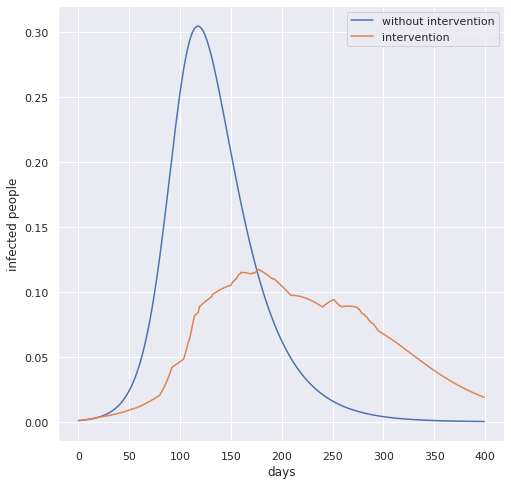

In [117]:
days = 400
qald, states = run_seir(days=days, int_vec=dis_int_vec)
height = seir_height(days=days, int_vec=dis_int_vec)
time = seir_time(days=days, int_vec=dis_int_vec)
burden = seir_burden(days=days, int_vec=dis_int_vec)
print(qald, height, time, burden)
ind = np.arange(days)   # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8, 8))
plt.plot(ind, states_base[1], label='without intervention')
plt.plot(ind, states[1], label='intervention')
plt.ylabel('infected people')
plt.xlabel('days')
plt.legend()
plt.show()

In [3]:
a = np.random.rand()
a

0.9275227745755729